## Data Analysis

In [59]:
# to handle datasets
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns

# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [85]:
# load dataset
data = pd.read_csv('../data/processed/train.csv', parse_dates = ["month_year"])

In [4]:
data.shape

(171910, 136)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171910 entries, 0 to 171909
Columns: 136 entries, id to adjusted_price
dtypes: float64(41), int64(2), object(93)
memory usage: 178.4+ MB


In [84]:
data.dtypes

id                                 object
price                               int64
date                               object
postcode                           object
type                               object
new_build                          object
land                               object
primary_address                    object
secondary_address                  object
street                             object
ppd                                object
record                             object
address1                           object
address2                           object
address3                           object
building_reference_number         float64
current_energy_rating              object
potential_energy_rating            object
current_energy_efficiency         float64
potential_energy_efficiency       float64
property_type                      object
built_form                         object
inspection_date                    object
local_authority                   

The training dataset contains 171910 rows, i.e., houses, and 136 columns, i.e., variables. 

**We will be visualising this data:**

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [8]:
# determine percentage of missing values
data[vars_with_na].isnull().mean()


primary_address                  0.000209
secondary_address                0.884905
street                           0.015142
address1                         0.394840
address2                         0.775225
address3                         0.983486
building_reference_number        0.394840
current_energy_rating            0.394840
potential_energy_rating          0.394840
current_energy_efficiency        0.394840
potential_energy_efficiency      0.394840
property_type                    0.394840
built_form                       0.394840
inspection_date                  0.394840
local_authority                  0.394962
constituency_x                   0.396417
county_y                         0.685155
lodgement_date                   0.394840
transaction_type                 0.394840
environment_impact_current       0.394840
environment_impact_potential     0.394840
energy_consumption_current       0.394840
energy_consumption_potential     0.394840
co2_emissions_current            0

In [62]:
# make a list of type of variables to help with plotting
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
num_vars = [var for var in data.columns if data[var].dtypes != 'object']
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]
cont_vars = [var for var in num_vars if var not in discrete_vars]
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

No handles with labels found to put in legend.


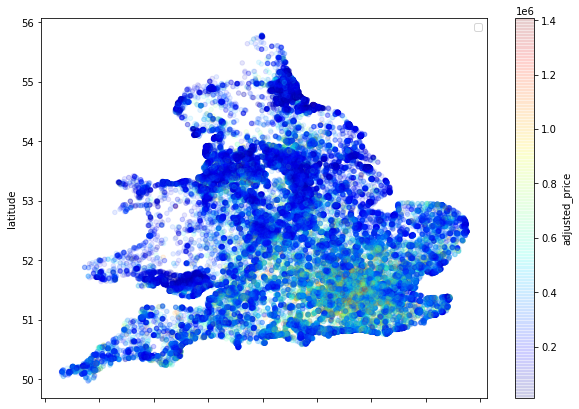

In [14]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
    figsize=(10,7),c="adjusted_price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

We can see that where we have the most houses and also regions around london seem to show a bit of yellow and red

Text(0, 0.5, 'Adjusted Price')

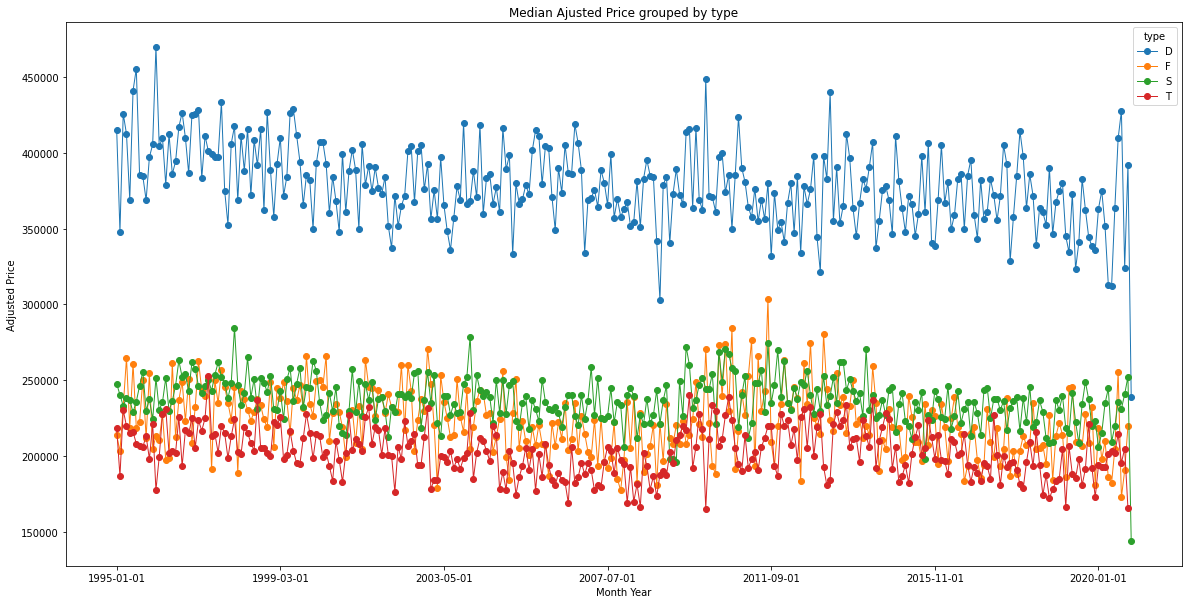

In [77]:
group_by = ['month_year', 'type']

# use unstack()
ax = (data[(data.type != 'O')].groupby(group_by)
    .median()['adjusted_price']
    .unstack()
    .plot(kind='line', figsize=(20,10), marker='o', linestyle='-', linewidth=1))
ax.set_title('Median Ajusted Price grouped by type')
ax.set_xlabel('Month Year')
ax.set_ylabel('Adjusted Price')

<AxesSubplot:xlabel='month_year'>

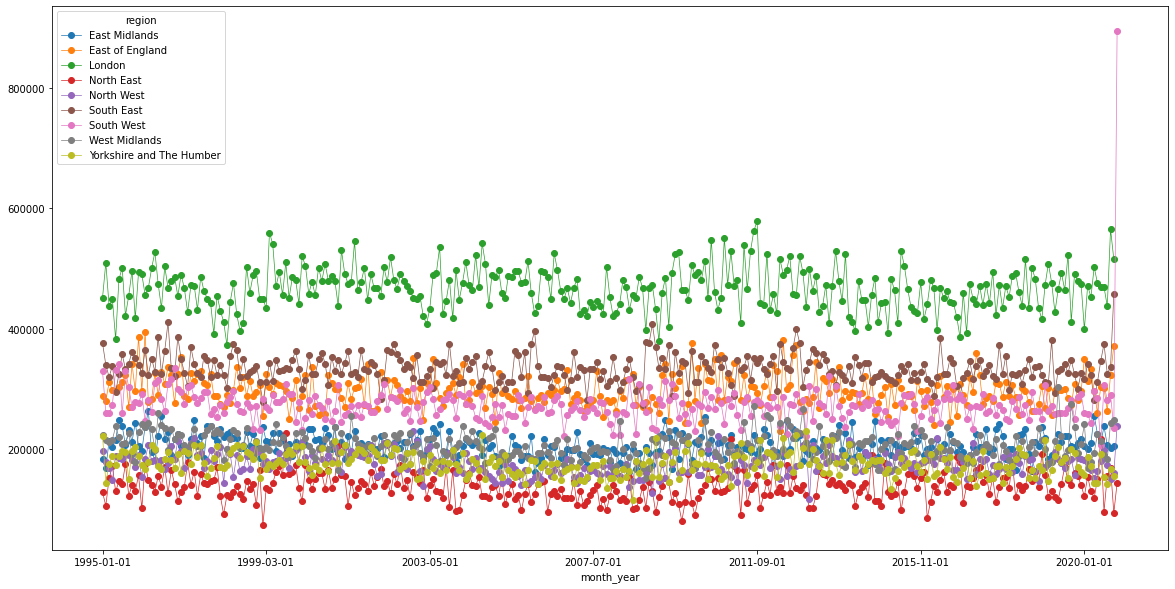

In [79]:
group_by = ['month_year', 'region']

# use unstack()
(data.groupby(group_by)
    .median()['adjusted_price']
    .unstack()
    .plot(kind='line', figsize=(20,10), marker='o', linestyle='-', linewidth=0.7))

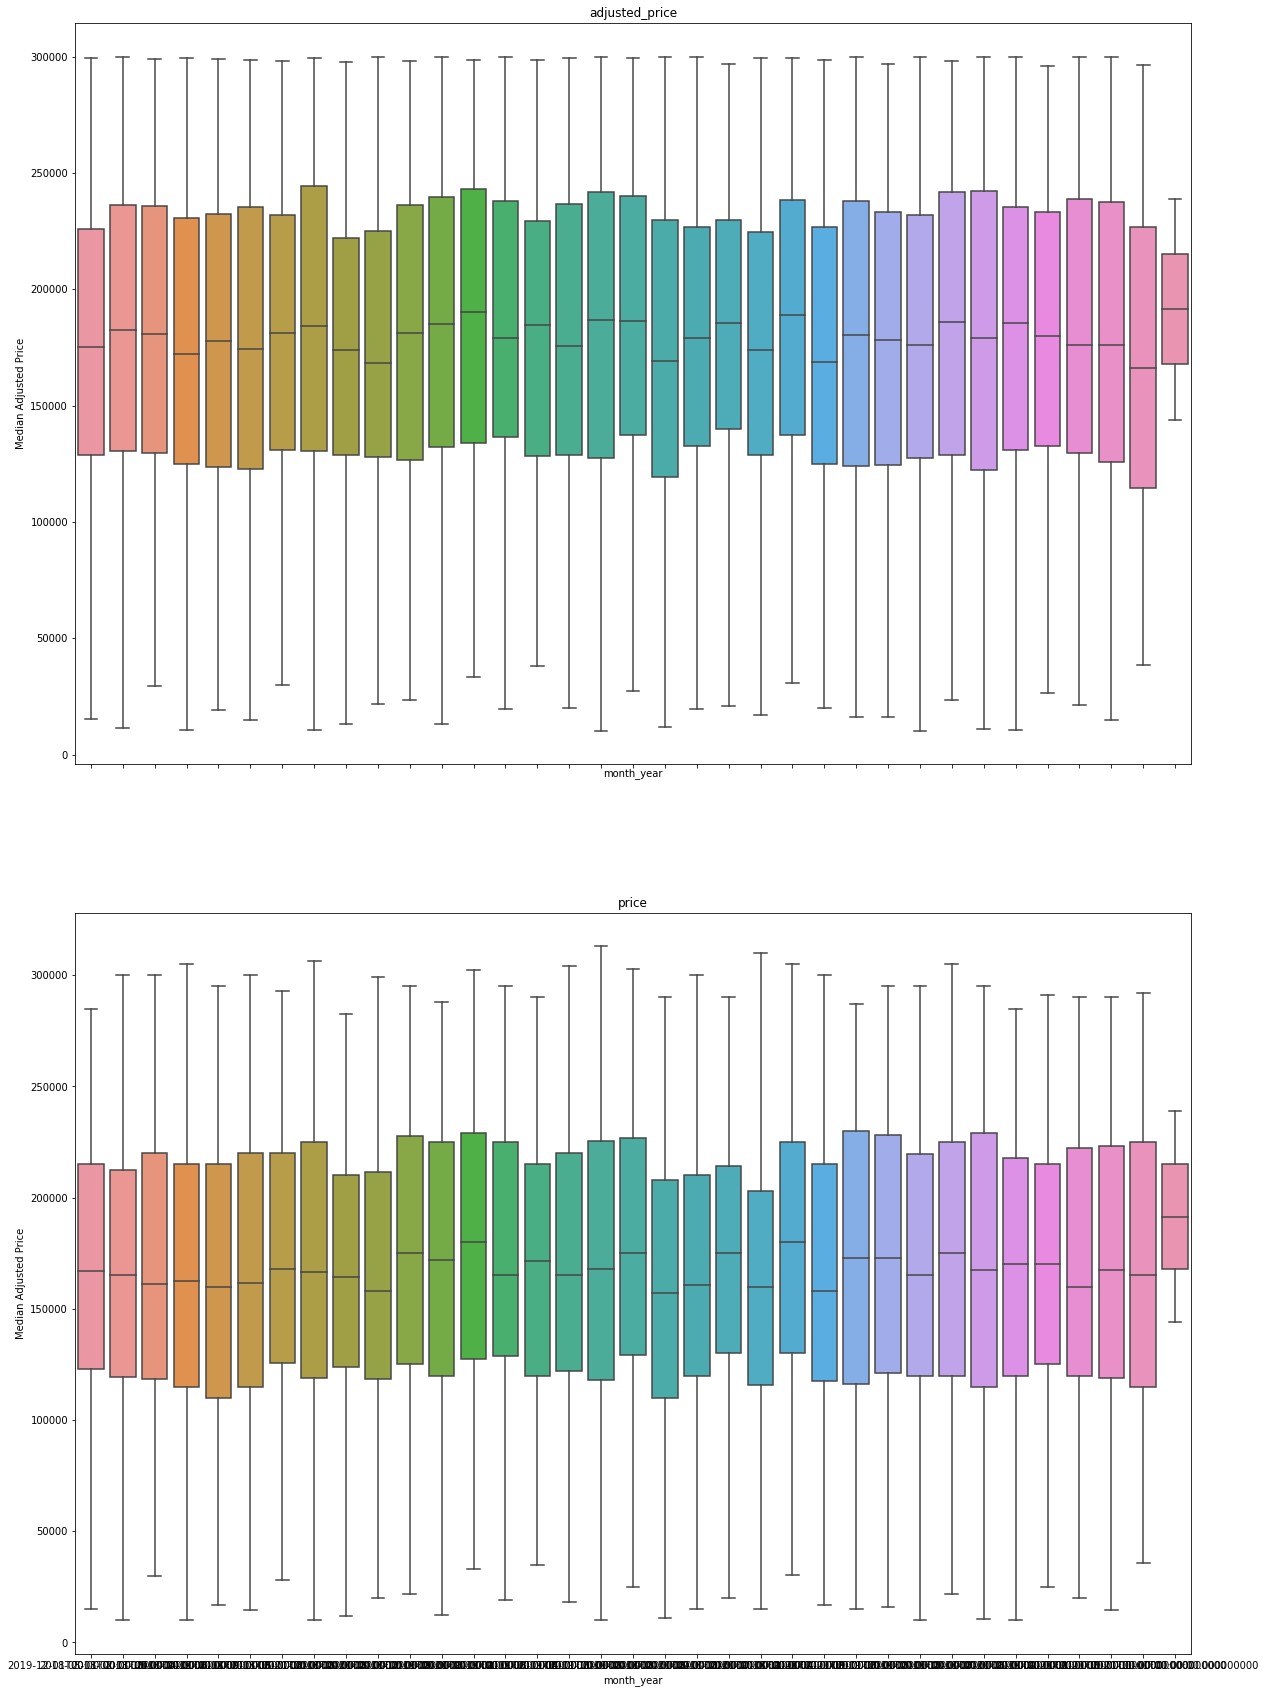

In [86]:
fig, axes = plt.subplots(2, 1, figsize=(20, 30), sharex=True)
for name, ax in zip(['adjusted_price', 'price'], axes):
    sns.boxplot(data=data[(data.adjusted_price <= 300000) & ((data.month_year).dt.year >= 2018)], x='month_year', y=name, ax=ax)
    ax.set_ylabel('Median Adjusted Price')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

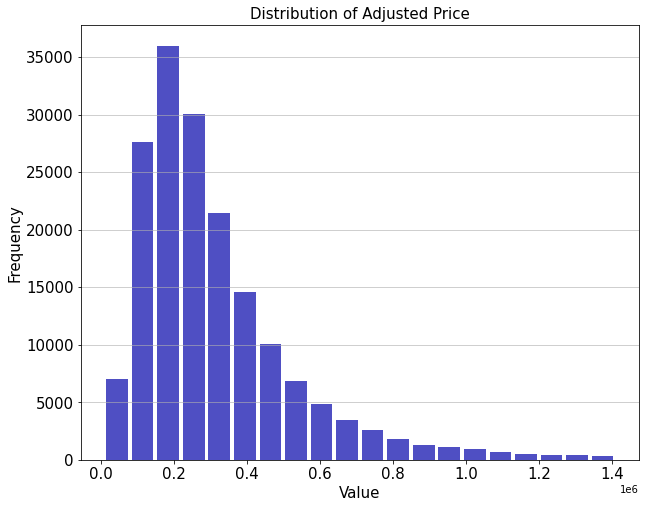

In [17]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=data["adjusted_price"], bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Adjusted Price',fontsize=15)
plt.show()

Right Skewed / Positive Skewed Adjusted Price Data

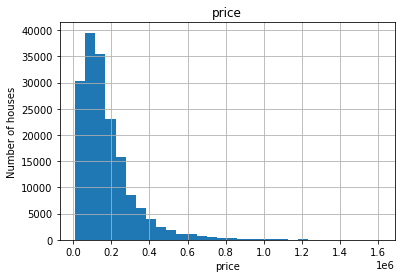

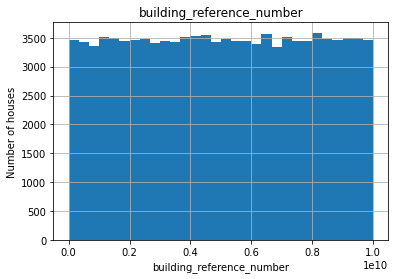

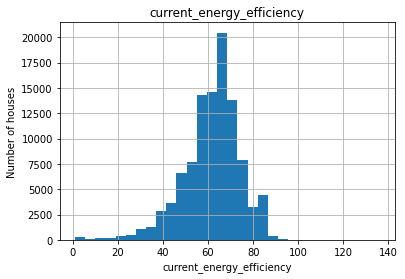

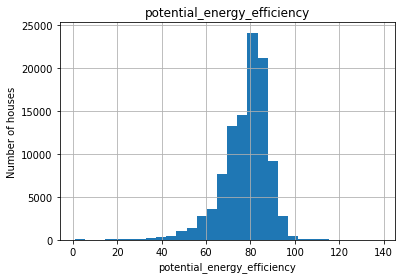

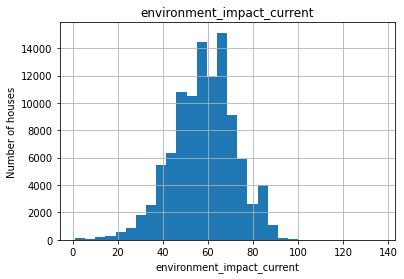

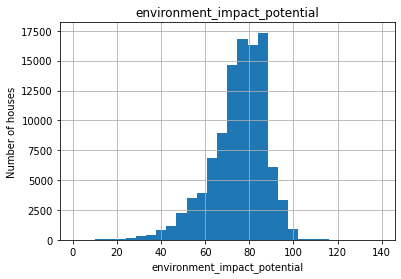

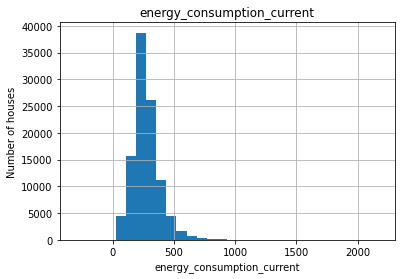

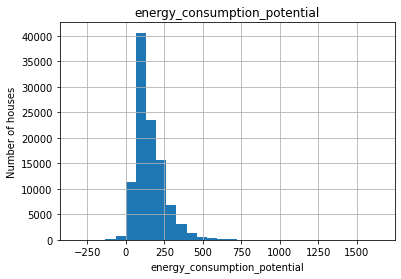

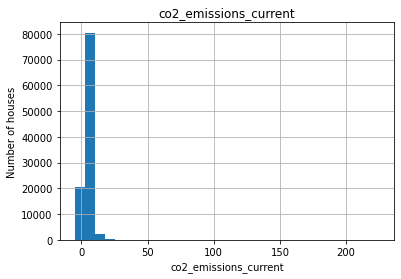

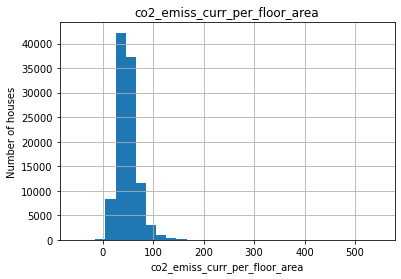

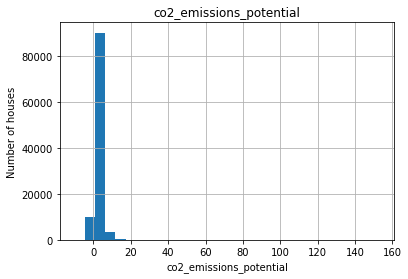

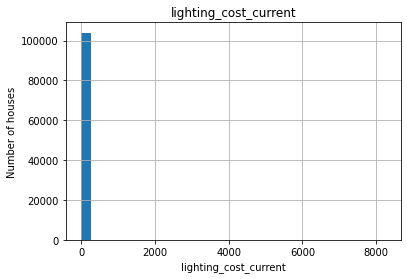

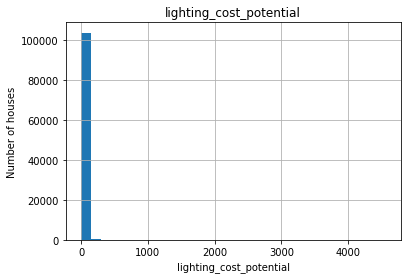

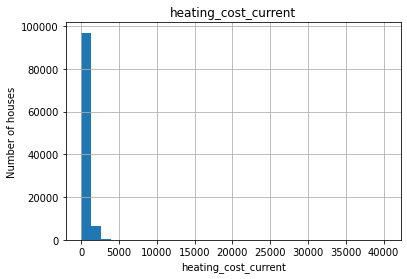

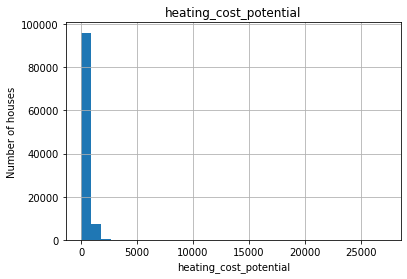

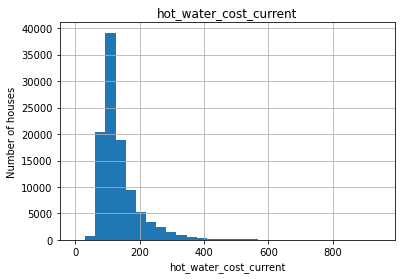

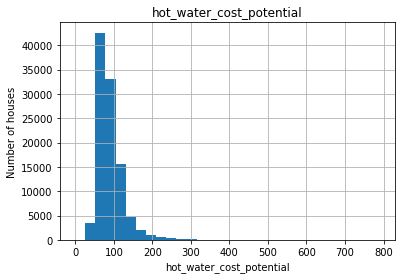

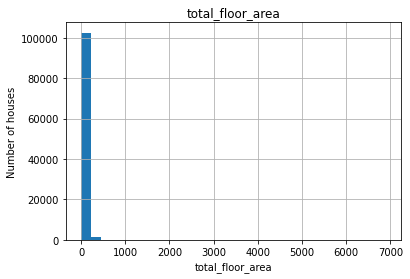

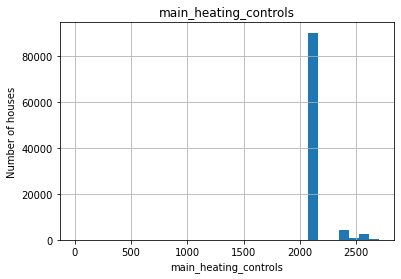

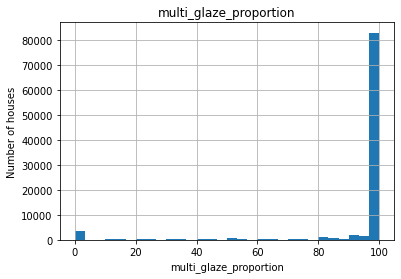

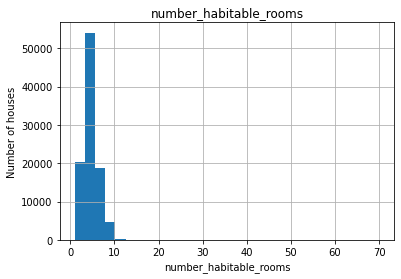

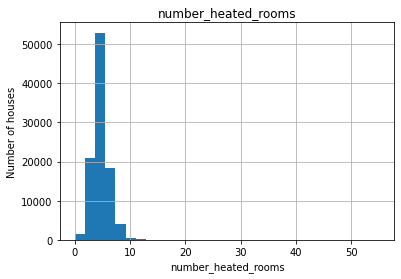

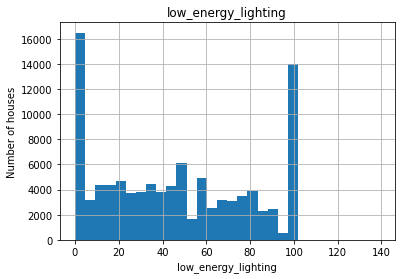

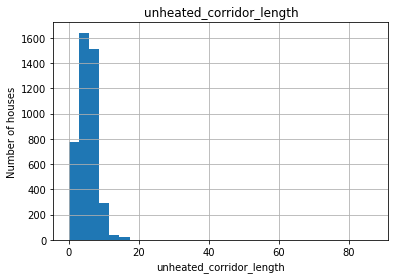

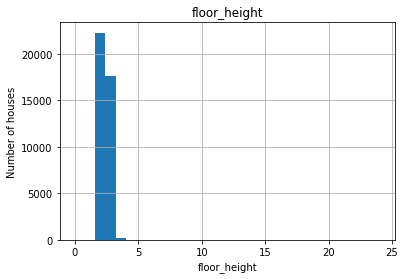

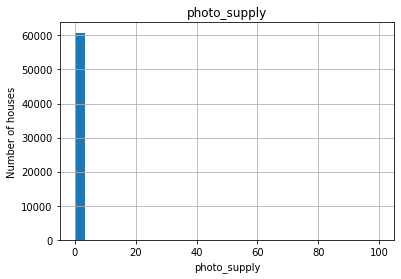

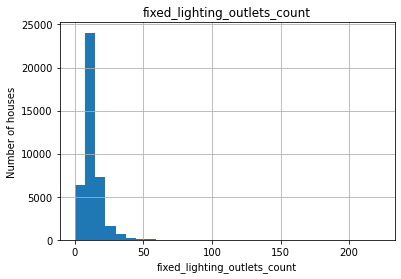

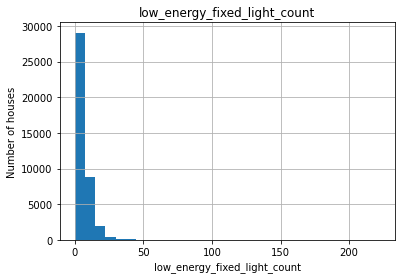

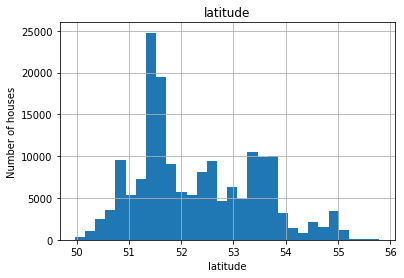

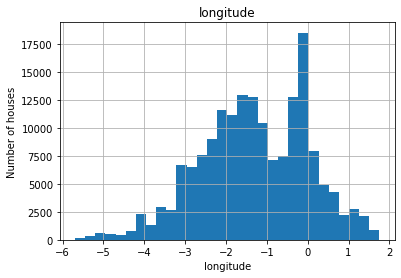

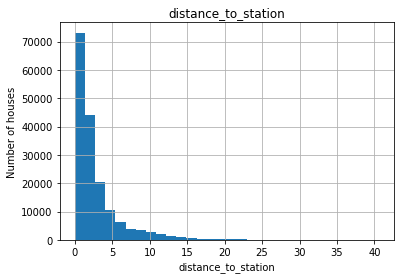

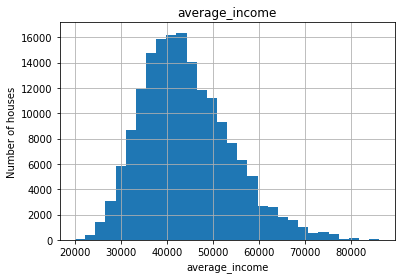

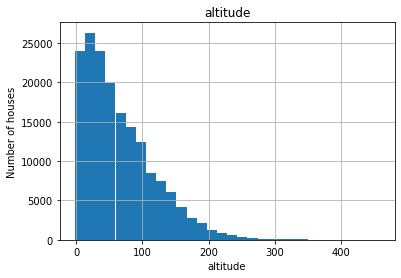

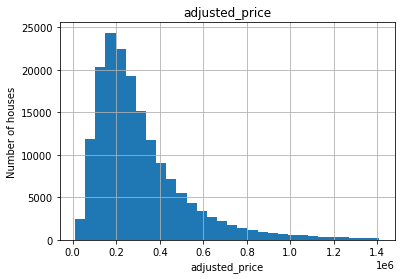

In [43]:
# Explore histogram of other variables

def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
0

for var in cont_vars:
    analyse_continuous(data, var)

In [56]:
data[cont_vars].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

price                          price                            1.000000
energy_consumption_current     co2_emiss_curr_per_floor_area    0.959911
environment_impact_current     current_energy_efficiency        0.934793
number_heated_rooms            number_habitable_rooms           0.933237
environment_impact_potential   potential_energy_efficiency      0.924688
heating_cost_current           co2_emissions_current            0.915161
environment_impact_potential   energy_consumption_potential     0.907791
co2_emiss_curr_per_floor_area  environment_impact_current       0.899631
heating_cost_current           heating_cost_potential           0.876262
total_floor_area               lighting_cost_potential          0.871672
energy_consumption_potential   potential_energy_efficiency      0.867736
co2_emiss_curr_per_floor_area  current_energy_efficiency        0.865258
energy_consumption_current     environment_impact_current       0.858394
lighting_cost_current          lighting_cost_potent

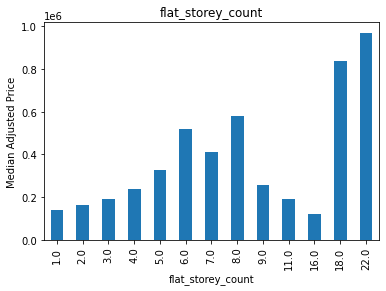

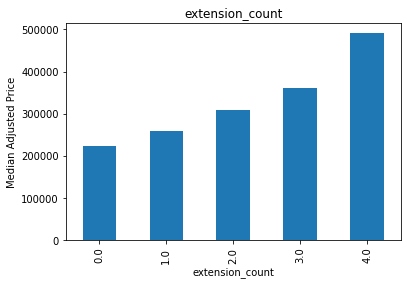

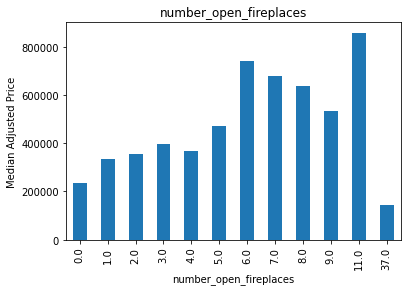

IndexError: index 0 is out of bounds for axis 0 with size 0

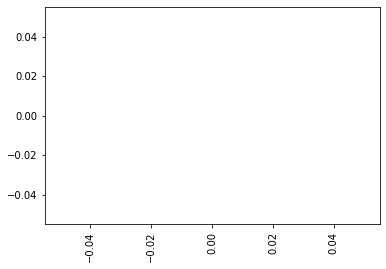

In [57]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['adjusted_price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median Adjusted Price')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

In [68]:
df_numerical = data.loc[:,num_vars]

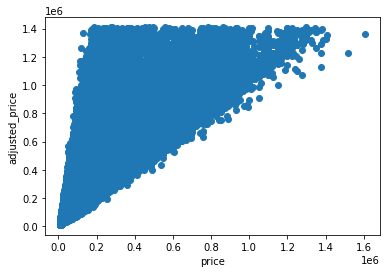

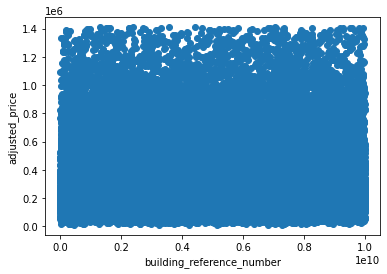

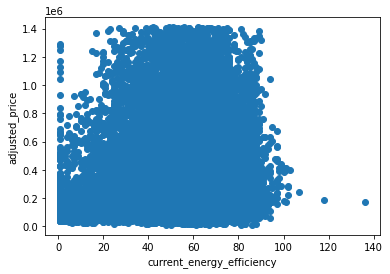

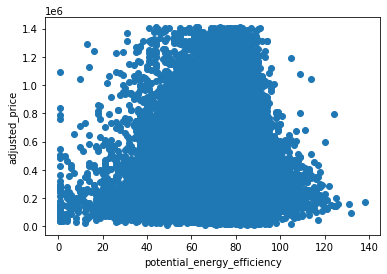

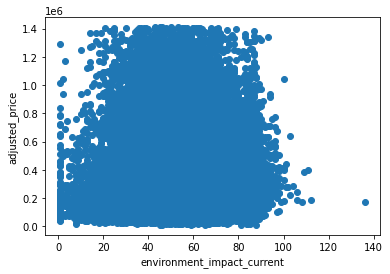

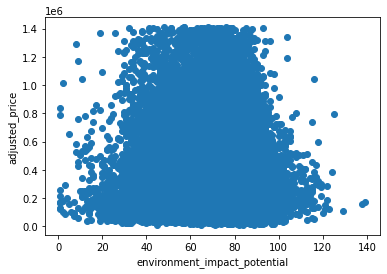

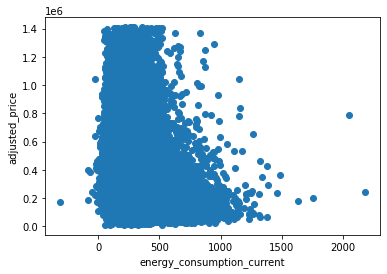

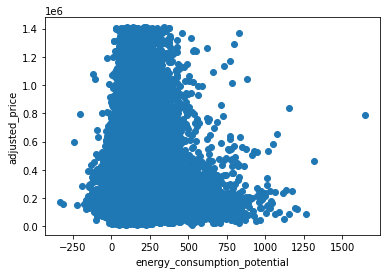

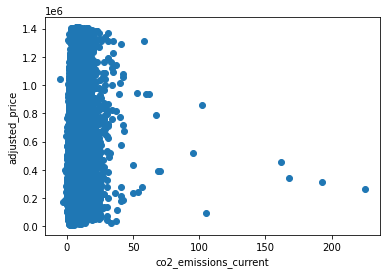

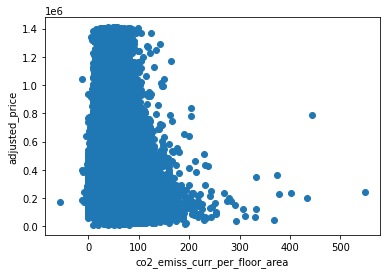

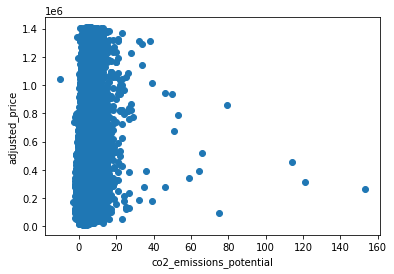

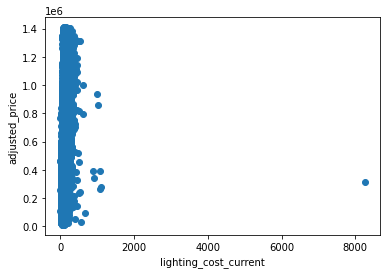

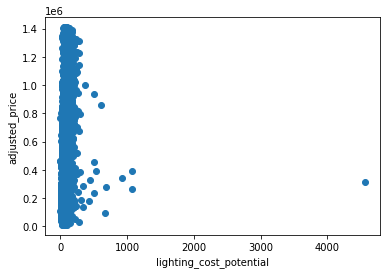

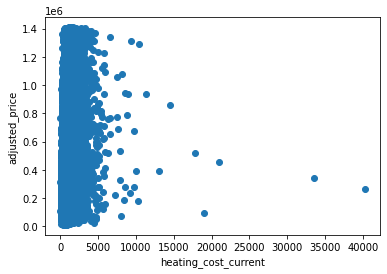

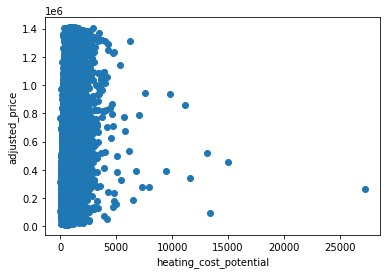

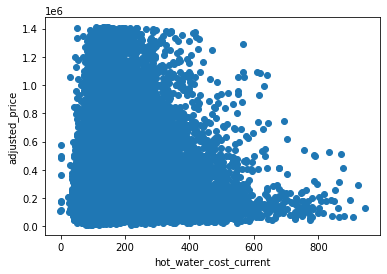

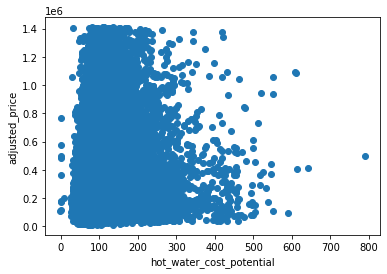

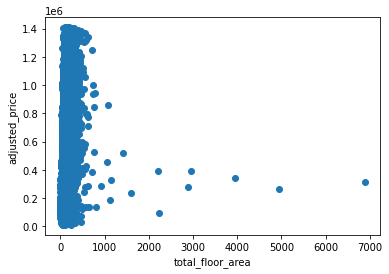

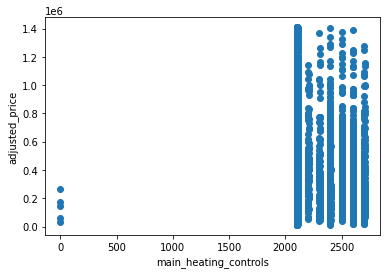

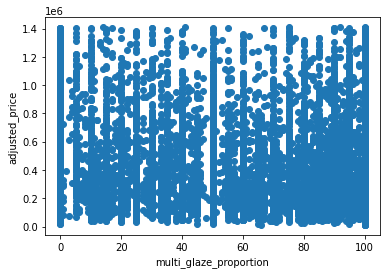

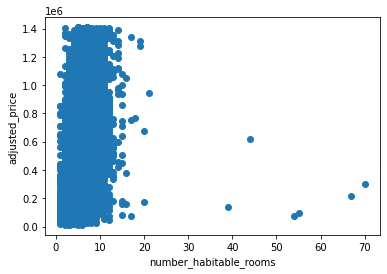

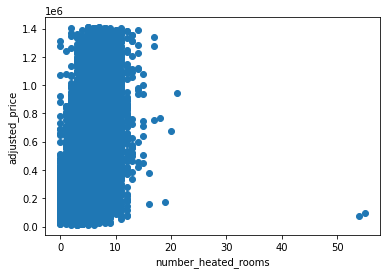

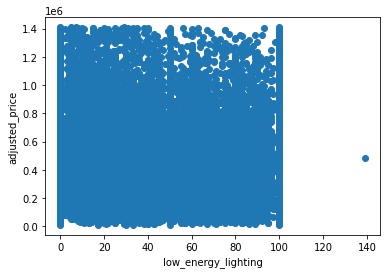

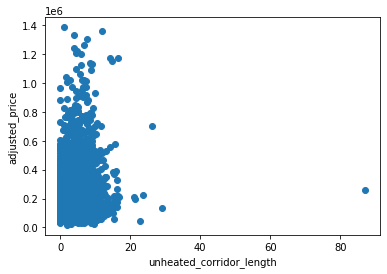

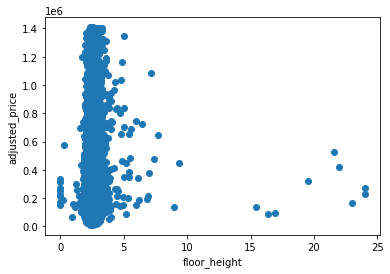

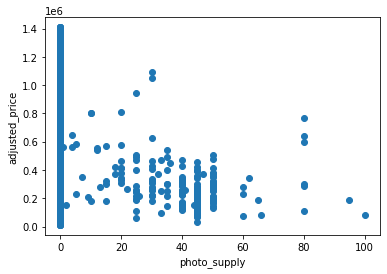

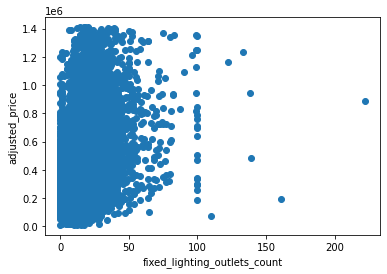

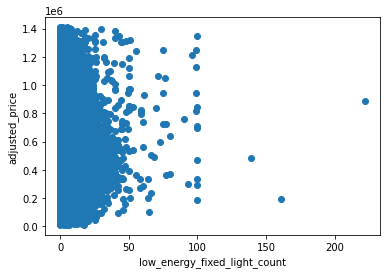

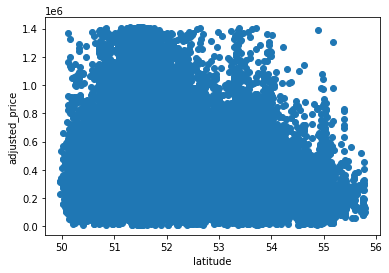

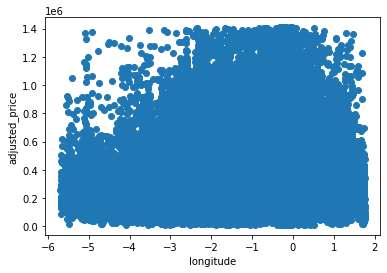

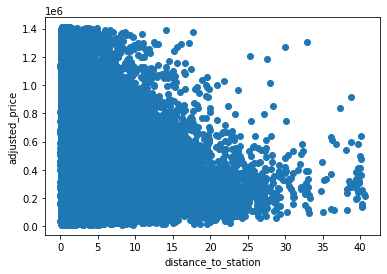

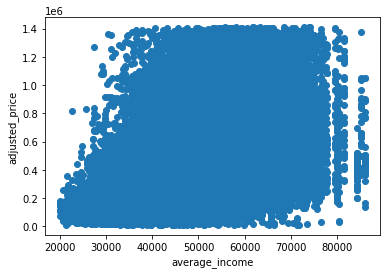

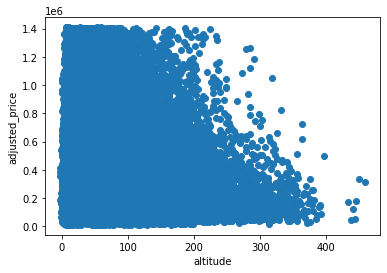

In [75]:
def analyse_continuous(df, var):
    df = df.copy()

    # plot
    plt.scatter(df[var], df['adjusted_price'])
    plt.ylabel('adjusted_price')
    plt.xlabel(var)
    plt.show()


for var in cont_vars:
    if var != 'adjusted_price':
        analyse_continuous(data, var)